# Intra-Cluster Light (ICL) profiles analysis in the Dark Energy Survey (DES)




In [1]:
%matplotlib inline
import healpy as hp
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from healpy.rotator import Rotator
import kmeans_radec
from kmeans_radec import KMeans, kmeans_sample
import os
import os.path
import configparser
import sys
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from astropy.table import Table

/home/hillysson/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Random points

In [2]:
ini_file= 'rand_y1.ini'
config = configparser.ConfigParser()
inifile = config.read(ini_file)
input_dir_rand=config.get('input', 'input_dir')
catalog_rand=config.get('input', 'catalog_file')
flag_files_rand=[ii.strip() for ii in config.get('input', 'flag_files').split(',')]
save_dir_rand=config.get('output', 'save_dir')
grid_output_dir_rand=config.get('grid_output', 'save_dir')
rand=pyfits.open(catalog_rand)[1].data
flags_rand=np.zeros(len(rand))+1
indices_rand=np.arange(len(rand))


cc=0
for file_flag in flag_files_rand:
    #if cc==1:
    #    continue
    if os.path.isfile(file_flag):
        flag_dat=np.loadtxt(file_flag, dtype=[('index', int), ('flag', int)], skiprows=1)
        flag=flag_dat['flag']
        print(sum(flag))
        if len(flag) == len(flags_rand):
            flags_rand=flags_rand*flag
    cc=cc+1
ind_rand, =np.where( (flags_rand > 0.5) & (flags_rand<1.5) )
print(len(ind_rand), len(indices_rand))



4227
9161
3859 10000


In [3]:
catalog_rand

'/home/hillysson/diffuselight_dataproc/dlight/input/y1a1_gold_1.0.3_wide+d10-mof-001d_run_redmapper_v6.4.17-2_randcat_z0.10-0.95_lgt020_vl02_extraction_10000.fit'

#### Removing indices that has no profiles

In [4]:
####
second_path_rand = 'rand6417_output_mask35/'
dat_type=[('distance', float), ('mean', float), ('median', float)]

to_be_removed = []

for jji, jj in enumerate(ind_rand):  # jji is an index from 0 to 356
                                # jj is the cluster id
    print(jj)

    file_jj_r=input_dir_rand+second_path_rand+'object_%i/profile_unmasked_%i_r.txt'%(jj,jj)


    if os.path.isfile(file_jj_r):
        continue
    else:
        print('there is no profile for the cluster with index '+str(jj))
        to_be_removed.append(jj)

# remove the clusters indices that there is no profiles
for rem in to_be_removed:
    ind_rand = np.delete(ind_rand, list(ind_rand).index(rem))
    
print('total number of clusters to use: '+str(len(ind_rand)))
        

0
there is no profile for the cluster with index 0
3
9
16
23
24
25
27
30
33
35
there is no profile for the cluster with index 35
43
48
56
57
59
there is no profile for the cluster with index 59
61
64
66
75
80
83
89
92
97
98
104
107
108
114
118
121
124
125
128
129
131
132
133
136
137
138
140
144
147
149
150
151
there is no profile for the cluster with index 151
152
there is no profile for the cluster with index 152
154
156
162
164
171
173
181
182
183
186
187
190
193
194
198
199
200
201
206
208
213
214
216
217
219
221
223
224
234
235
237
239
242
245
247
there is no profile for the cluster with index 247
251
252
253
257
260
261
262
263
268
272
there is no profile for the cluster with index 272
273
275
276
277
278
279
281
282
283
286
287
288
290
292
295
296
297
298
299
there is no profile for the cluster with index 299
302
305
there is no profile for the cluster with index 305
306
314
there is no profile for the cluster with index 314
315
316
319
324
329
331
337
339
340
343
344
there is no

2768
there is no profile for the cluster with index 2768
2773
2774
there is no profile for the cluster with index 2774
2775
2776
2781
2788
2797
2798
2799
2812
2813
there is no profile for the cluster with index 2813
2815
2817
2822
2823
2824
2827
2832
2833
2835
2839
2840
2841
2845
2846
2848
2853
2858
2859
2866
2876
2879
2883
2886
2893
2898
2899
2900
2903
2906
2908
2910
2911
2914
2915
2916
2917
2918
2919
2920
2921
2922
2932
2934
2941
2943
2946
2948
2949
2951
2954
2955
2957
2958
2962
2964
2965
2969
there is no profile for the cluster with index 2969
2971
2974
2977
2980
2981
2983
2986
2990
2991
2994
2995
2996
2997
2999
there is no profile for the cluster with index 2999
3003
3004
3005
there is no profile for the cluster with index 3005
3008
3012
3013
3015
3019
3020
3024
3029
3032
3033
3034
3039
3041
3043
3045
3049
3053
3060
3061
3062
3067
there is no profile for the cluster with index 3067
3073
3074
3080
3082
3087
3089
3092
3093
3095
3103
3105
3106
3110
3114
3117
3118
3121
3122
3123
3128
3

5846
5848
5851
5854
5860
5861
5869
5870
5871
5872
5873
5874
5875
5877
5878
5880
5881
5882
5883
5884
5885
5886
5887
5891
there is no profile for the cluster with index 5891
5892
5895
5906
5907
5908
5911
5919
5928
5930
5934
5935
5936
5937
5939
5944
there is no profile for the cluster with index 5944
5945
there is no profile for the cluster with index 5945
5947
5950
5951
5954
5955
5957
there is no profile for the cluster with index 5957
5958
5960
there is no profile for the cluster with index 5960
5962
5967
5968
5969
5970
5972
there is no profile for the cluster with index 5972
5973
5975
5977
5981
5982
5986
5987
5990
5991
5992
5996
5997
5998
6000
6003
6009
6010
6011
6016
6018
6021
6024
6028
6030
6032
6038
6040
6042
6046
6049
6055
6058
6060
6065
6066
6067
6068
6073
6080
6081
6084
6086
6087
6088
6091
6095
6097
6098
6100
6102
6103
6105
6110
6111
6117
6121
6122
6126
6127
6129
6136
6137
6140
6144
6148
6149
6150
6154
6157
6158
6161
6163
6164
6165
6166
6167
6168
6170
6174
6175
6177
6181
6183
618

9877
9882
9885
9888
9890
9892
9896
9907
9910
9915
9916
9918
9921
9924
9925
9926
9927
9930
9932
9933
9938
9940
9941
9945
9947
9951
9953
9955
9957
9958
9959
9960
9967
9969
9970
9973
9974
9976
9977
9978
9981
9983
9984
9985
9987
9994
9997
9999
total number of clusters to use: 3720


#### The funtion below is for getting the mean random profile for a given redshift

In [5]:
def z_to_mean(ind_rand, nbins, input_dir, second_path, sufix=''):
    
    ####
    input_dir='/home/hillysson/diffuselight_dataproc/dlight/'
    second_path='rand6417_output_mask35/'
    dat_type=[('distance', float), ('mean', float), ('median', float)]
    data_temp=np.loadtxt(input_dir+second_path+'object_%i/profile_%s%i_r.txt'%(ind_rand[0],sufix,ind_rand[0]), dtype=dat_type)

    
    ncluster=len(ind_rand)
    yy_r=np.zeros([nbins, ncluster])+99999
    xx=np.zeros([nbins, ncluster])+99999
    

    for jji, jj in enumerate(ind_rand):

        file_jj_r=input_dir+second_path+'object_%i/profile_%s%i_r.txt'%(jj,sufix,jj)
        
        if os.path.isfile(file_jj_r):
            data_r=np.loadtxt(file_jj_r, dtype=dat_type)

            if len(data_r['distance'])==nbins:
                yy_r[:, jji]=data_r['mean']#*yyfactor
                xx[:, jji]=data_temp['distance']#*xxfactor

                

    ## jacknife sampling
    from astropy.io.fits import Column

    # getting the center position of rdmp clusters
    coord_rand=np.transpose( np.array([rand[ind_rand]['ra'], rand[ind_rand]['dec']]) )
    ncen = 40

    if os.path.isfile('centers.txt') == 0: #this is false, so the code is jumping this part
        km = kmeans_sample(coord_rand, ncen, maxiter=100, tol=1.0e-5)
        print("found centers:",km.centers)
        print("converged?",km.converged)
        np.savetxt('centers.txt', km.centers)
    centers=np.loadtxt('centers.txt')

    # find the rdmp cluster closest to the center of the region:    
    labels_rand=kmeans_radec.find_nearest(coord_rand, centers)
    #print(labels_rand)
    print(str(len(labels_rand))+' random points')
    print('  ')


    len_kmeans=centers.shape[0] # 40, number of regions
    dir_ind='/home/hillysson/diffuselight_dataproc/dlight/output/redmapper_y1_jacknife_sub_profiles/'
    os.system('mkdir '+dir_ind)
    

    c0=Column(name='Jacknife_index', format='K')
    c1=Column(name='x_axis', format='%iE'%nbins)
    c2=Column(name='mean', format='%iE'%nbins)
    cols = pyfits.ColDefs([c0, c1, c2])
    hdu = pyfits.BinTableHDU.from_columns(cols, nrows=len_kmeans)

    for ii in range(len_kmeans): # binning in kmean regions

        # subtracting clusters that belong to this region
        ind_rand,=np.where( (labels_rand != ii) )    
        print('region %i:'%(ii))
        print(str(len(labels_rand)-len(ind_rand))+' cluster(s) were removed')
        print(str(len(ind_rand))+' cluster(s) were used')
        print('')

        yyrmean_ind=np.zeros(nbins)    
        for jj in range(nbins): # binning in radius        
            temp_r_mean =yy_r[jj, :]        
            ind_temp, =np.where((temp_r_mean < 30000) & (temp_r_mean >-30000) & \
                                (labels_rand != ii) )        
            arr=temp_r_mean[ind_temp]
            yyrmean_ind[jj]=np.mean(arr)

        hdu.data[ii]['Jacknife_index']=ii
        hdu.data[ii]['x_axis']=xx.T[0]
        hdu.data[ii]['mean']=yyrmean_ind
    
    rand_mean, err=jacknife_statistics(hdu.data['mean'])
    xx_arr = hdu.data['x_axis']
    yy_arr = hdu.data['mean']
    
    
    return xx_arr, yy_arr, rand_mean, err

def jacknife_statistics(dat1, dat2 = np.zeros(1)):

    njack, narray = dat1.shape
    if dat1.shape != dat2.shape:
        dat2 = np.zeros([njack, narray]) # alternatively dat2 is 0
        print('no second array, using 0')
    mean = np.zeros(narray); err = np.zeros(narray)
    err_factor = np.sqrt(njack-1)

    for ii in range(narray):
        bkg = 0#dat1[:, narray-1] - dat2[:, narray-1] # 0 for default
        mean[ii] = np.mean(dat1[:, ii] - dat2[:, ii]-bkg)
        err[ii] = np.std(dat1[:, ii] - dat2[:, ii]-bkg) * err_factor
    return mean, err


#nbins=359
#xxbins = np.arange(0.0,2000.1, 2000/nbins )
xx_rand_unmask, yy_rand_unmask, yy_r_rand_unmask, err_unmask =z_to_mean( ind_rand, 359, '/home/hillysson/diffuselight_dataproc/dlight/', 'rand6417_output_mask35/', 'unmasked_')


3720 random points
  
region 0:
64 cluster(s) were removed
3656 cluster(s) were used

region 1:
93 cluster(s) were removed
3627 cluster(s) were used

region 2:
95 cluster(s) were removed
3625 cluster(s) were used

region 3:
180 cluster(s) were removed
3540 cluster(s) were used

region 4:
89 cluster(s) were removed
3631 cluster(s) were used



/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in less
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in greater


region 5:
101 cluster(s) were removed
3619 cluster(s) were used

region 6:
78 cluster(s) were removed
3642 cluster(s) were used

region 7:
43 cluster(s) were removed
3677 cluster(s) were used

region 8:
9 cluster(s) were removed
3711 cluster(s) were used

region 9:
81 cluster(s) were removed
3639 cluster(s) were used

region 10:
84 cluster(s) were removed
3636 cluster(s) were used

region 11:
105 cluster(s) were removed
3615 cluster(s) were used

region 12:
172 cluster(s) were removed
3548 cluster(s) were used

region 13:
66 cluster(s) were removed
3654 cluster(s) were used

region 14:
97 cluster(s) were removed
3623 cluster(s) were used

region 15:
101 cluster(s) were removed
3619 cluster(s) were used

region 16:
16 cluster(s) were removed
3704 cluster(s) were used

region 17:
100 cluster(s) were removed
3620 cluster(s) were used

region 18:
100 cluster(s) were removed
3620 cluster(s) were used

region 19:
114 cluster(s) were removed
3606 cluster(s) were used

region 20:
140 cluster(s

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


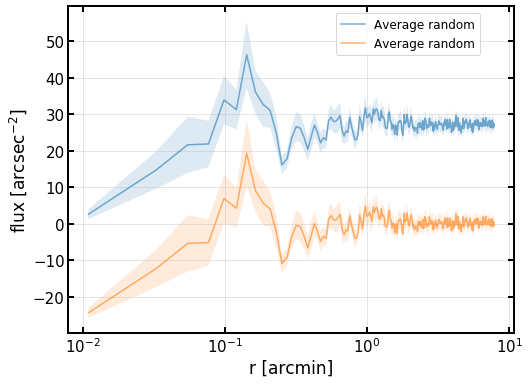

In [6]:
mask = xx_rand_unmask[0]>xx_rand_unmask[0][299]
km_re=1 # km_re = kmeans region
ytemp_rand, =np.where((np.array(yy_rand_unmask[km_re][mask]) < 300000) & (np.array(yy_rand_unmask[km_re][mask]) >-300000))
y_non_nan= np.array(yy_rand_unmask[km_re][mask])[ytemp_rand]
mean_rand= np.mean(y_non_nan) # all of them have -0.49

yyfactorr = 1.0/(0.263)**2
skyback = mean_rand*yyfactorr


fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
#plt.yscale('symlog')

plt.grid(alpha=0.4)


mea = yy_rand_unmask[0]*yyfactorr
up = (yy_rand_unmask[0]+err_unmask)*yyfactorr
low = (yy_rand_unmask[0]-err_unmask)*yyfactorr

plt.plot(xx_rand_unmask[0]*0.263/60, mea, '-', lw=1.5,alpha=0.6,label='Average random')
plt.fill_between(xx_rand_unmask[0]*0.263/60, up, low, alpha=0.15, label='')


mea0 = mea-skyback 
up0 = up-skyback 
low0 = low-skyback 
plt.plot(xx_rand_unmask[0]*0.263/60, mea0, '-', lw=1.5,alpha=0.6,label='Average random')
plt.fill_between(xx_rand_unmask[0]*0.263/60, up0, low0, alpha=0.15, label='')


plt.ylabel('flux [arcsec$^{-2}$]', fontsize=17)
plt.xlabel('r [arcmin]', fontsize=17)
#plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=2.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=2.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.6, 0.98), loc=2, fontsize=12,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

# redMaPPer points

In [49]:
ini_file= 'redmapper_y1.ini'
config = configparser.ConfigParser()
inifile = config.read(ini_file)
input_dir_rdmp=config.get('input', 'input_dir')
catalog=config.get('input', 'catalog_file')
flag_files_rdmp=[ii.strip() for ii in config.get('input', 'flag_files').split(',')]
save_dir_rdmp=config.get('output', 'save_dir')
grid_output_dir_rdmp=config.get('grid_output', 'save_dir')
rdmp=pyfits.open(catalog)[1].data
flags_rdmp=np.zeros(len(rdmp))+1
indices_rdmp=np.arange(len(rdmp))

str_ngals = ['$\lambda$ = [20;30)',
             '$\lambda$ = [30;45)',
             '$\lambda$ = [45;60)',
             r'$\lambda$ = [60;$\infty$)']
richness_dir = ['richness_20_30/',
                'richness_30_45/',
                'richness_45_60/',
                'richness_60_beyond/']

# getting indices in the flag files
for file_flag in flag_files_rdmp:
    if os.path.isfile(file_flag):
        flag_dat=np.loadtxt(file_flag, dtype=[('index', int), ('flag', int)], skiprows=1)
        flag=flag_dat['flag']
        if len(flag) == len(flags_rdmp):
            flags_rdmp=flags_rdmp*flag

ind1, =np.where( (flags_rdmp > 0.5) & (flags_rdmp<1.5) & (rdmp['lambda_chisq']>= 20) & (rdmp['lambda_chisq'] < 30))
print(len(ind1), len(indices_rdmp))
ind2, =np.where( (flags_rdmp > 0.5) & (flags_rdmp<1.5) & (rdmp['lambda_chisq']>= 30) & (rdmp['lambda_chisq'] < 45))
print(len(ind2), len(indices_rdmp))
ind3, =np.where( (flags_rdmp > 0.5) & (flags_rdmp<1.5) & (rdmp['lambda_chisq']>= 45) & (rdmp['lambda_chisq'] < 60))
print(len(ind3), len(indices_rdmp))
ind4, =np.where( (flags_rdmp > 0.5) & (flags_rdmp<1.5) & (rdmp['lambda_chisq']>= 60) & (rdmp['lambda_chisq'] < 40000000))
print(len(ind4), len(indices_rdmp))

307 7066
152 7066
52 7066
32 7066


#### Removing indices that has no profiles

In [160]:
ngal_bins=4
inds = [ind1,ind2,ind3,ind4]
ind = inds[ngal_bins-1]
Ncl = len(ind)

####
second_path_rdmp = 'rdmp6417_output_mask35_v2/'
dat_type=[('distance', float), ('mean', float), ('median', float)]
dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]


if ngal_bins==1:
    to_be_removed = [3132, 3173] #bin1
if ngal_bins==2:
    to_be_removed = [1138, 2363, 2764] #bin2
    
# remove the clusters indices that there is no profiles
for rem in to_be_removed:
    ind = np.delete(ind, list(ind).index(rem))

to_be_removed = []

for jji, jj in enumerate(ind):  # jji is an index from 0 to 356
                                # jj is the cluster id
    
    file_jj_r=input_dir_rdmp+second_path_rdmp+'object_%i/profile_unmasked_%i_r.txt'%(jj,jj)
    if os.path.isfile(file_jj_r):
        continue
    else:
        print('there is no profile for the cluster  with index '+str(jj))
        to_be_removed.append(jj)

# remove the clusters indices that there is no profiles
for rem in to_be_removed:
    ind = np.delete(ind, list(ind).index(rem))
    
print('total number of clusters to use: '+str(len(ind)))
        

total number of clusters to use: 32


#### dividing by rmem

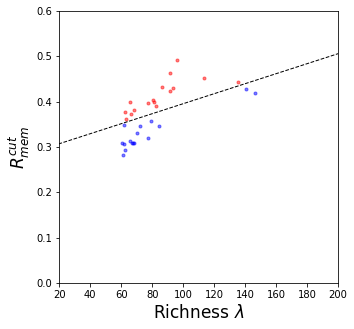

In [161]:
def rm_mrr(Lambda): #McClintock relation
    X_piv, z_piv = 40., 0.35
    A0, B0, C0, Z0 = 14.489,  1.356, -0.30, 0.275
    return (10.**A0) * ((Lambda/ X_piv)**B0)  * (((1+Z0) / (1+z_piv)) **(C0))

def criticaldens(z): # Critical density function  
    from astropy import units as u
    SolarM = u.Msun # solar masses
    kpc3 = u.kpc * u.kpc * u.kpc # Mpc^3
    Conv_factor = SolarM / kpc3
    rhoc_ = cosmo.critical_density(z)
    rhoc = rhoc_.to(Conv_factor)
    return rhoc.value

clusters = rdmp[ind]
len(clusters)

numflag = 4
flagrmem = ['', '_rmem_rlambda','_rmem_r200', '_rmem_scaled', '_2cuts', '_2cuts_r200'][numflag]
# ''              = rmemcut
# '_rmem_rlambda' = rmemcut/rlambda
# '_rmem_r200'    = rmemcut/r200m
# '_rmem_scaled'  = xx_r/r200m

members = Table.read(input_dir_rdmp+'input/y1a1_gold_1.0.3-d10-mof-001d_run_redmapper_v6.4.17-vlim_lgt20_desformat_catalog_members.fit')
coefs = np.loadtxt(input_dir_rdmp+'input/y1a1_gold_1.0.3-d10-mof-001d_run_redmapper_v6.4.17-vlim_lgt20_desformat_catalog.fit_coefs%s.txt'%(flagrmem))


pm = members['P']*members['PFREE']*members['THETA_R']*members['THETA_I']

Pcrit = (pm > 0.8)

Rmemcut = []
lambda_ = []
for clid in clusters['MEM_MATCH_ID']:
    clusterid = (members['MEM_MATCH_ID'] == clid)
    pi = pm[Pcrit*clusterid]
    Ri = members['R'][Pcrit*clusterid]
    Rmemcut.append(np.sum(pi*Ri)/np.sum(pi))  
    lambda_.append(np.sum(pi))
Rmemcut = np.array(Rmemcut)
lambda_ = np.array(clusters['LAMBDA_CHISQ']) # np.array(lambda_)  
z_ = np.array(clusters['Z_LAMBDA'])

if numflag == 4 and numflag != 5:
    nlistbin = [[20,30], [30,45], [45,60], [60, 150]]
    mask_rich = (np.array(lambda_)>= nlistbin[ngal_bins-1][0]) & (np.array(lambda_)< nlistbin[ngal_bins-1][1])
    ind  = ind[mask_rich]
    Rmemcut = Rmemcut[mask_rich]
    lambda_ = np.array(lambda_)[mask_rich]
    z_ = z_[mask_rich]
    
rlambda = (np.array(lambda_)/100)**0.2
m200 = rm_mrr(np.array(lambda_))
rhoc = criticaldens(z_)
rhom = cosmo.Om0 * rhoc * (1 + z_)**3
r200c = np.cbrt( (3.*m200) / (2000.*np.pi*rhoc) ) 
r200m = np.cbrt( (3.*m200) / (2000.*np.pi*rhom) ) 

if numflag != 4 and numflag != 5:
    std0 = 0.48*coefs[ngal_bins-1][3]

if numflag != 4 and numflag != 5:
    R1 = coefs[ngal_bins-1][1]*np.array(lambda_)+coefs[ngal_bins-1][2]+std0
    R2 = coefs[ngal_bins-1][1]*np.array(lambda_)+coefs[ngal_bins-1][2]-std0
    
else:
    Rmed = coefs[ngal_bins-1][1]*np.array(lambda_)+coefs[ngal_bins-1][2]

if numflag==0:
    Rcut = Rmemcut
if numflag==1:
    Rcut = Rmemcut/rlambda
if numflag==2:
    Rcut = Rmemcut/r200m
if numflag==3:
    Rcut = Rmemcut
if numflag==4:
    Rcut = Rmemcut
if numflag==5:
    Rcut = Rmemcut
    
    
if numflag != 4 and numflag != 5:
    std0 = 0.48*coefs[ngal_bins-1][3]
    diff1 = (Rcut-R1)>=0
    diff2 = (Rcut-R2)<0
    diff = ~diff1*~diff2

    lambda_up, Rcut_up = np.array(lambda_)[diff1], np.array(Rcut)[diff1]
    lambda_cen, Rcut_cen = np.array(lambda_)[diff], np.array(Rcut)[diff]
    lambda_low, Rcut_low = np.array(lambda_)[diff2], np.array(Rcut)[diff2]
    #print(len(Rcut_up), len(Rcut_cen), len(Rcut_low))

    up_ind  = ind[diff1]
    cen_ind = ind[diff]
    low_ind = ind[diff2]
    
else:
    diff1 = (Rcut-Rmed)>=0
    diff2 = (Rcut-Rmed)<0
    
    lambda_up, Rcut_up = np.array(lambda_)[diff1], np.array(Rcut)[diff1]
    lambda_low, Rcut_low = np.array(lambda_)[diff2], np.array(Rcut)[diff2]
    #print(len(lambda_up), len(lambda_low))

    up_ind  = ind[diff1]
    low_ind = ind[diff2]
    
ngalsbins=np.arange(0, 201, 10)

plt.figure(1, figsize=(5, 5))
plt.plot(lambda_up, Rcut_up, 'ro', markersize=3, alpha=0.5)
if numflag != 4 and numflag != 5:
    plt.plot(lambda_cen, Rcut_cen, 'go', markersize=3, alpha=0.5)
plt.plot(lambda_low, Rcut_low, 'bo', markersize=3, alpha=0.5)
plt.plot(ngalsbins, coefs[ngal_bins-1][1]*ngalsbins+coefs[ngal_bins-1][2], '--',lw=1, color='k', label='median fitting')
plt.xlim(20, 200)
plt.ylim(0, 0.6)
plt.xlabel('Richness $\lambda$', fontsize=17)
if numflag==0 or numflag==3:
    plt.ylabel('$R_{mem}^{cut}$', fontsize=17)
if numflag==1:
    plt.ylabel('$R_{mem}^{cut}$/$R_{\lambda}}$', fontsize=17)
if numflag==2:
    plt.ylabel('$R_{mem}^{cut}$/$R_{200}}$', fontsize=17)
if numflag==4:
    plt.ylabel('$R_{mem}^{cut}$', fontsize=17)
if numflag==5:
    plt.ylabel('$R_{mem}^{cut}$/$R_{200}}$', fontsize=17)
plt.show()

#### The funtion below is for getting the cluster profile for a given redshift

#### The funtion below is for getting the cluster profile for a given redshift

In [163]:
def z_to_mean_rdmp(z_, ind, nbins, input_dir, second_path):
    
    ####
    
    input_dir='/home/hillysson/diffuselight_dataproc/dlight/'
    second_path='rdmp6417_output_mask35_v2/'
    dat_type=[('distance', float), ('mean', float), ('median', float)]
    
    file_jj_r=input_dir+second_path+'object_%i/profile_unmasked_%i_r.txt'%(ind,ind)

    if os.path.isfile(file_jj_r):
        data_r=np.loadtxt(file_jj_r, dtype=dat_type)

        #xxfactor=cosmo.kpc_proper_per_arcmin(z_).value*0.263/60
        #yyfactor=1.0/(xxfactor**2)

        if len(data_r['distance'])==nbins:
            yy_r     = data_r['mean']#*yyfactor
            xx       = data_r['distance']#*xxfactor
    
    return xx, yy_r

# Subtracting the cluster profile from the random profile

In [164]:
coord_rdmp=np.transpose( np.array([rdmp[ind]['ra'], rdmp[ind]['dec']]) )
centers=np.loadtxt('centers.txt')
labels_rdmp=kmeans_radec.find_nearest(coord_rdmp, centers)

In [189]:
nbins=359
#xxbins = np.arange(0.0,2000.1, 2000/nbins )
#phy_xx = (xxbins[:-1]+xxbins[1:])/2


import time
import multiprocessing
from multiprocessing import Pool
from scipy.interpolate import interp1d

os.system('mkdir '+save_dir_rdmp+'subtracted_profiles') 
os.system('mkdir '+save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]) 
dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]

def sub_profiles(jj):
    

    start = time.time()

    zp_= rdmp['Z_LAMBDA'][jj]

    xx_rdmp, yy_r_rdmp=z_to_mean_rdmp(zp_, jj, nbins, input_dir_rdmp,second_path_rdmp)

    km_re = labels_rdmp[list(ind).index(jj)] 

    yy_r_sub_  = yy_r_rdmp - yy_rand_unmask[km_re]# - skyback


    yy_fact=(1+zp_)**4.0/1.275**4.0
    xx_temp=0.263*cosmo.kpc_proper_per_arcmin(zp_).value/60*xx_rdmp
    xx_grid=0.263*cosmo.kpc_proper_per_arcmin(0.275).value/60*xx_rdmp
    func=interp1d(xx_temp, yy_r_sub_, fill_value = 'extrapolate')
    yy_r_sub=func(xx_grid)*yy_fact


    # choose your radius bins:
    num = 5
    xxbins = np.logspace(np.log10(xx_rand_unmask[0][5]), np.log10(xx_rand_unmask[0][-1]), num)
    p_xx = []
    p_xx = p_xx+list(xx_grid[(xx_grid<xx_rand_unmask[0][5])])
    p_xx = p_xx+list((xxbins[:-1]+xxbins[1:])/2)

    # Stacking the random profiles
    p_yy = []
    p_yy = p_yy+list(yy_r_sub[(xx_grid<xx_rand_unmask[0][5])])

    for xxb in range(len(xxbins)-1):
        xxmask = (xx_grid>=xxbins[xxb]) * (xx_grid<xxbins[xxb+1])

        ytemp, =np.where((np.array(yy_r_sub[xxmask]) < 300000) & (np.array(yy_r_sub[xxmask]) >-300000))
        y_non_nan= np.array(yy_r_sub[xxmask])[ytemp]
        p_yy.append(     np.mean(y_non_nan))

    z=list(zip(p_xx, p_yy))
    np.savetxt(dir_sub+'subtracted_profile_uprmem_unmasked_%i%s.txt'%(jj,flagrmem), z, fmt='%f, %f', header='# xx, r_mean')
    print(str(list(up_ind).index(jj))+": %f sec" % (time.time() - start))

    return


if __name__ == "__main__": 

    pool = Pool(processes=4)
    pool.map(sub_profiles, up_ind)

np.savetxt(dir_sub+'uprmem_indices_unmasked%s.txt'%(flagrmem), up_ind, fmt='%i', header='# Index')

#sub_profiles(151)    
#sub_profiles(4688)
#sub_profiles(4701)
#sub_profiles(ind[1])


0: 0.319481 sec
3: 0.305790 sec
1: 0.316929 sec
2: 0.316244 sec


/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater


4: 0.084031 sec
6: 0.088763 sec
7: 0.103969 sec
8: 0.036722 sec


/home/hillysson/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


11: 0.032783 sec
9: 0.097210 sec


/home/hillysson/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


5: 0.226863 sec
13: 0.093000 sec
15: 0.088995 sec
10: 0.285859 sec
12: 0.377791 sec
14: 0.339548 sec


In [166]:
nbins=359
#xxbins = np.arange(0.0,2000.1, 2000/nbins )
#phy_xx = (xxbins[:-1]+xxbins[1:])/2


import time
import multiprocessing
from multiprocessing import Pool
from scipy.interpolate import interp1d

os.system('mkdir '+save_dir_rdmp+'subtracted_profiles') 
os.system('mkdir '+save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]) 
dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]

def sub_profiles(jj):
    
    if os.path.isfile(dir_sub+'subtracted_profile_cenrmem_unmasked_%i.txt'%(jj)):

        #print('subtracted_profile_cenrmem_unmasked_%i.txt already exists!'%(jj))
        #return
        
    #else:

        start = time.time()
        
        zp_= rdmp['Z_LAMBDA'][jj]

        xx_rdmp, yy_r_rdmp=z_to_mean_rdmp(zp_, jj, nbins, input_dir_rdmp,second_path_rdmp)
        
        km_re = labels_rdmp[list(ind).index(jj)] 

        yy_r_sub_  = yy_r_rdmp - yy_rand_unmask[km_re]# - skyback


        yy_fact=(1+zp_)**4.0/1.275**4.0
        xx_temp=0.263*cosmo.kpc_proper_per_arcmin(zp_).value/60*xx_rdmp
        xx_grid=0.263*cosmo.kpc_proper_per_arcmin(0.275).value/60*xx_rdmp
        func=interp1d(xx_temp, yy_r_sub_, fill_value = 'extrapolate')
        yy_r_sub=func(xx_grid)*yy_fact
        
               
        # choose your radius bins:
        num = 5
        xxbins = np.logspace(np.log10(xx_rand_unmask[0][5]), np.log10(xx_rand_unmask[0][-1]), num)
        p_xx = []
        p_xx = p_xx+list(xx_grid[(xx_grid<xx_rand_unmask[0][5])])
        p_xx = p_xx+list((xxbins[:-1]+xxbins[1:])/2)

        # Stacking the random profiles
        p_yy = []
        p_yy = p_yy+list(yy_r_sub[(xx_grid<xx_rand_unmask[0][5])])

        for xxb in range(len(xxbins)-1):
            xxmask = (xx_grid>=xxbins[xxb]) * (xx_grid<xxbins[xxb+1])

            ytemp, =np.where((np.array(yy_r_sub[xxmask]) < 300000) & (np.array(yy_r_sub[xxmask]) >-300000))
            y_non_nan= np.array(yy_r_sub[xxmask])[ytemp]
            p_yy.append(     np.mean(y_non_nan))
            
        z=list(zip(p_xx, p_yy))
        np.savetxt(dir_sub+'subtracted_profile_cenrmem_unmasked_cenrmem_%i%s.txt'%(jj,flagrmem), z, fmt='%f, %f', header='# xx, r_mean')
        print(str(list(cen_ind).index(jj))+": %f sec" % (time.time() - start))
        
        return

if numflag != 4 and numflag != 5:
    if __name__ == "__main__": 

        pool = Pool(processes=4)
        pool.map(sub_profiles, cen_ind)

    np.savetxt(dir_sub+'cenrmem_indices_unmasked%s.txt'%(flagrmem), cen_ind, fmt='%i', header='# Index')

#sub_profiles(151)    
#sub_profiles(4688)
#sub_profiles(4701)
#sub_profiles(ind[1])


In [188]:
nbins=359
#xxbins = np.arange(0.0,2000.1, 2000/nbins )
#phy_xx = (xxbins[:-1]+xxbins[1:])/2


import time
import multiprocessing
from multiprocessing import Pool
from scipy.interpolate import interp1d

os.system('mkdir '+save_dir_rdmp+'subtracted_profiles') 
os.system('mkdir '+save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]) 
dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]

def sub_profiles(jj):

    start = time.time()

    zp_= rdmp['Z_LAMBDA'][jj]

    xx_rdmp, yy_r_rdmp=z_to_mean_rdmp(zp_, jj, nbins, input_dir_rdmp,second_path_rdmp)

    km_re = labels_rdmp[list(ind).index(jj)] 

    yy_r_sub_  = yy_r_rdmp - yy_rand_unmask[km_re]# - skyback


    yy_fact=(1+zp_)**4.0/1.275**4.0
    xx_temp=0.263*cosmo.kpc_proper_per_arcmin(zp_).value/60*xx_rdmp
    xx_grid=0.263*cosmo.kpc_proper_per_arcmin(0.275).value/60*xx_rdmp
    func=interp1d(xx_temp, yy_r_sub_, fill_value = 'extrapolate')
    yy_r_sub=func(xx_grid)*yy_fact


    # choose your radius bins:
    num = 5
    xxbins = np.logspace(np.log10(xx_rand_unmask[0][5]), np.log10(xx_rand_unmask[0][-1]), num)
    p_xx = []
    p_xx = p_xx+list(xx_grid[(xx_grid<xx_rand_unmask[0][5])])
    p_xx = p_xx+list((xxbins[:-1]+xxbins[1:])/2)

    # Stacking the random profiles
    p_yy = []
    p_yy = p_yy+list(yy_r_sub[(xx_grid<xx_rand_unmask[0][5])])

    for xxb in range(len(xxbins)-1):
        xxmask = (xx_grid>=xxbins[xxb]) * (xx_grid<xxbins[xxb+1])

        ytemp, =np.where((np.array(yy_r_sub[xxmask]) < 300000) & (np.array(yy_r_sub[xxmask]) >-300000))
        y_non_nan= np.array(yy_r_sub[xxmask])[ytemp]
        p_yy.append(     np.mean(y_non_nan))

    z=list(zip(p_xx, p_yy))
    np.savetxt(dir_sub+'subtracted_profile_lowrmem_unmasked_%i%s.txt'%(jj,flagrmem), z, fmt='%f, %f', header='# xx, r_mean')
    #print(str(list(low_ind).index(jj))+": %f sec" % (time.time() - start))

    return

    
if __name__ == "__main__": 

    pool = Pool(processes=4)
    pool.map(sub_profiles, low_ind)
    
np.savetxt(dir_sub+'lowrmem_indices_unmasked%s.txt'%(flagrmem), low_ind, fmt='%i', header='# Index')

#sub_profiles(151)    
#sub_profiles(4688)
#sub_profiles(4701)
#sub_profiles(ind[1])


57
60
10
3
66
101
124
115
139
143
164
175
162
202
421
242


In [173]:
'subtracted_profile_lowrmem_unmasked_%i%s.txt'%(jj,flagrmem)

'subtracted_profile_lowrmem_unmasked_435_2cuts.txt'

In [183]:
low_ind

array([  3,  10,  57,  60,  66, 101, 115, 124, 139, 143, 162, 164, 175,
       202, 242, 421])

In [169]:
low_ind

array([  3,  10,  57,  60,  66, 101, 115, 124, 139, 143, 162, 164, 175,
       202, 242, 421])